# Junction Reads (Adjacency Matrix) Analysis with SCANPY
This script demonstrates that junction-level count matrices, can yield meaningful cell embeddings using the SCANPY pipeline.

In [1]:
import os
import pandas as pd
import scanpy as sc
import numpy as np
import anndata

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/mnt/md0/kailu/anaconda3/envs/DOLPHIN/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.4 anndata==0.11.1 umap==0.5.7 numpy==2.0.2 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.6 louvain==0.8.2 pynndescent==0.5.13


In [ ]:
adata = sc.read_h5ad("./data/Adjacency_fsla.h5ad")

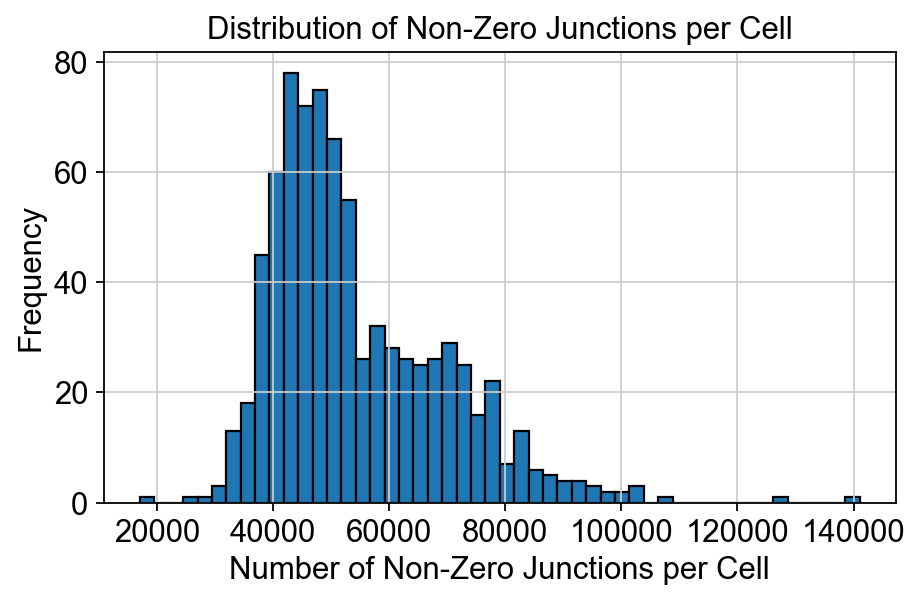

In [12]:
import matplotlib.pyplot as plt

df_adata = adata.to_df()
non_zero_counts = (df_adata != 0).sum(axis=1)
plt.figure(figsize=(6, 4))
plt.hist(non_zero_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Non-Zero Junctions per Cell')
plt.ylabel('Frequency')
plt.title('Distribution of Non-Zero Junctions per Cell')
plt.tight_layout()
plt.show()


normalizing counts per cell
    finished (0:00:00)


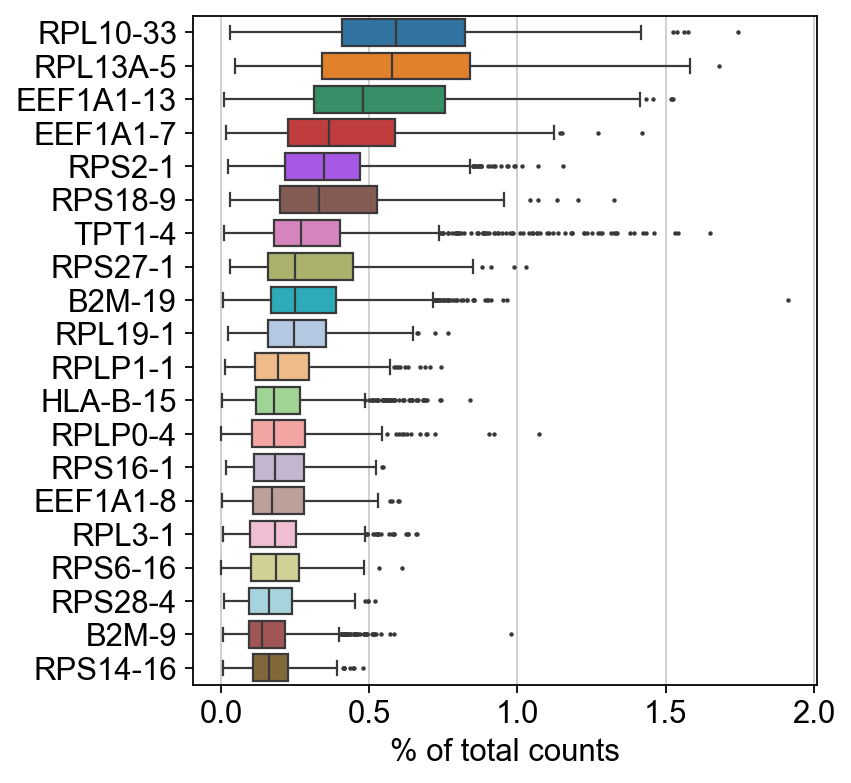

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [4]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6245766 genes that are detected in less than 3 cells


In [6]:
# adata.var['mt'] = adata.var_names.str.startswith('MT')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

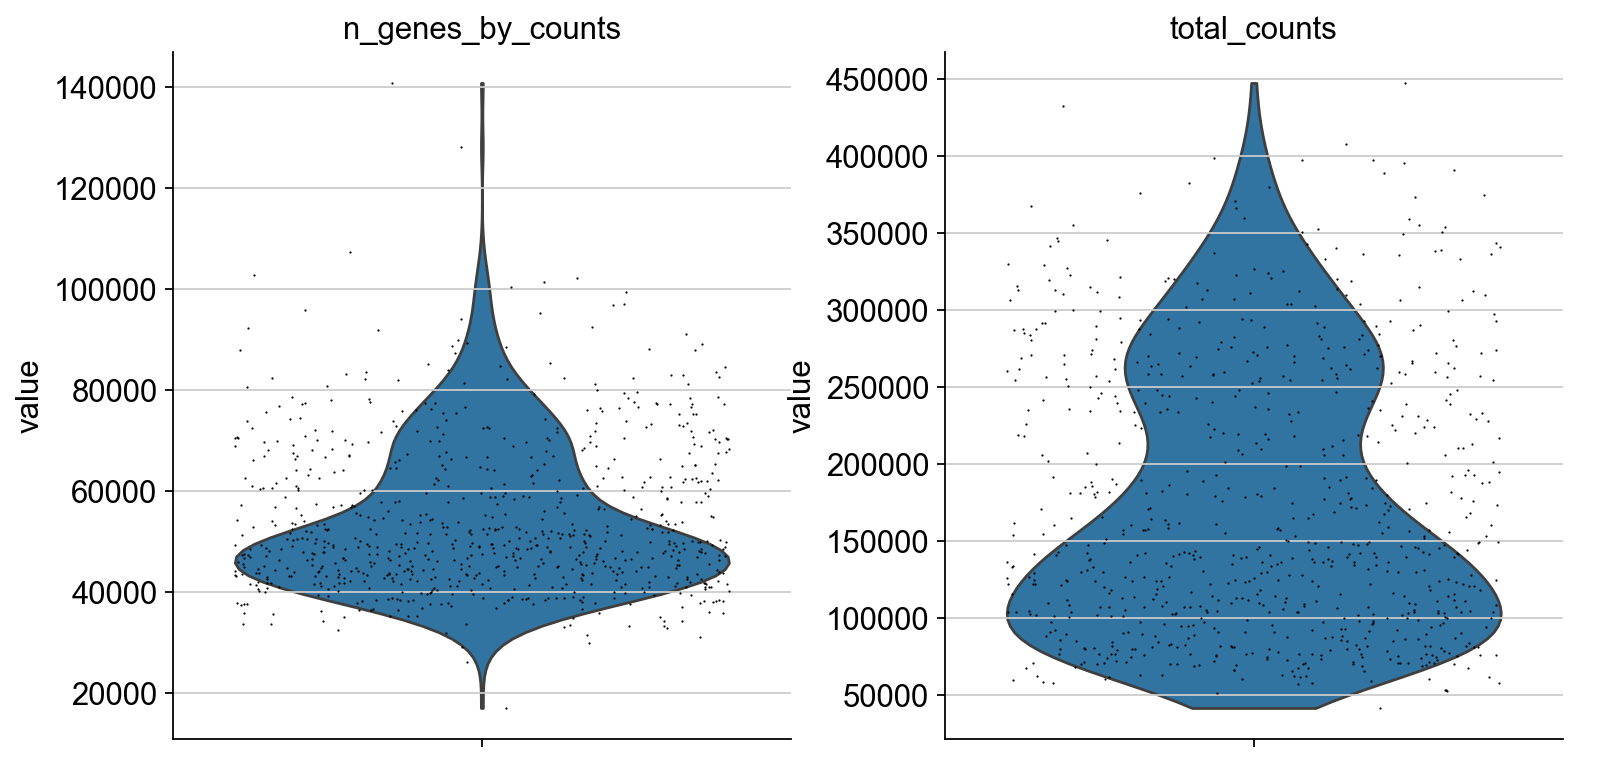

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

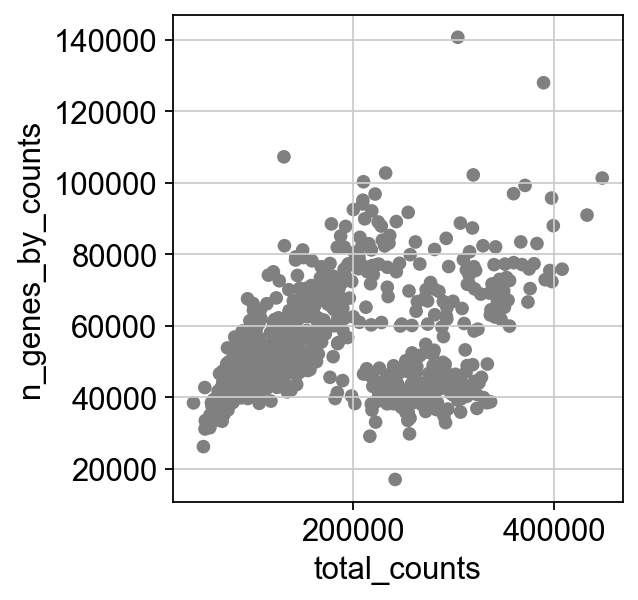

In [8]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [9]:
sc.pp.normalize_total(adata)

normalizing counts per cell
    finished (0:00:00)


In [10]:
adata

AnnData object with n_obs × n_vars = 795 × 283478
    obs: 'CB', 'celltype1', 'celltype2', 'n_genes_by_counts', 'total_counts'
    var: 'gene_id', 'gene_name', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [11]:
sc.pp.log1p(adata)

In [12]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/mnt/md0/kailu/anaconda3/envs/DOLPHIN/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


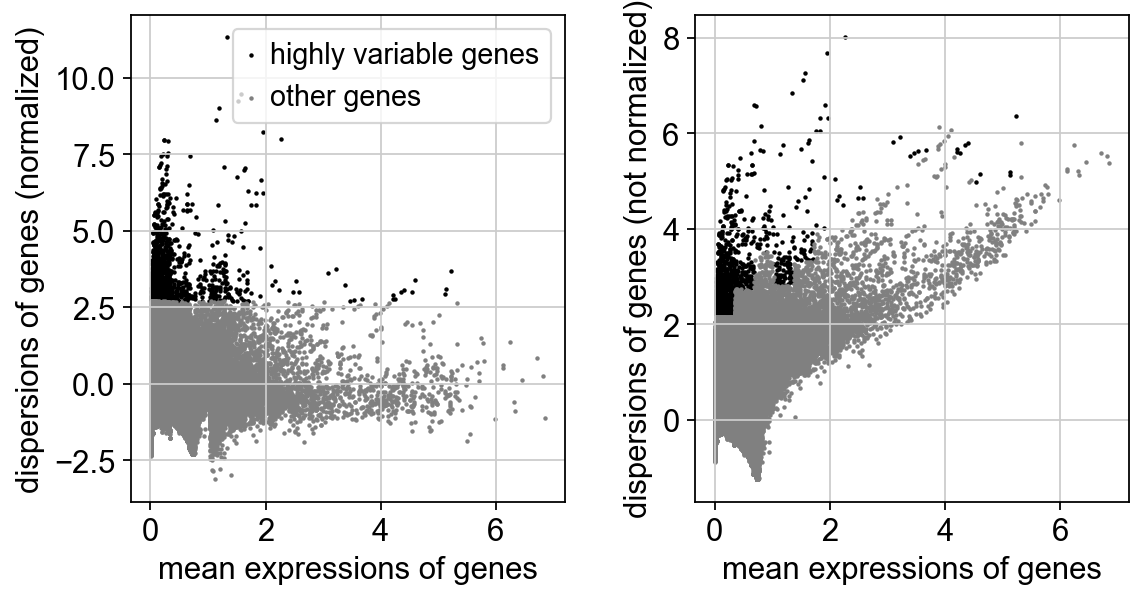

In [13]:
sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata

In [15]:
adata = adata[:, adata.var.highly_variable]

In [16]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50


/mnt/md0/kailu/anaconda3/envs/DOLPHIN/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


    finished (0:00:02)


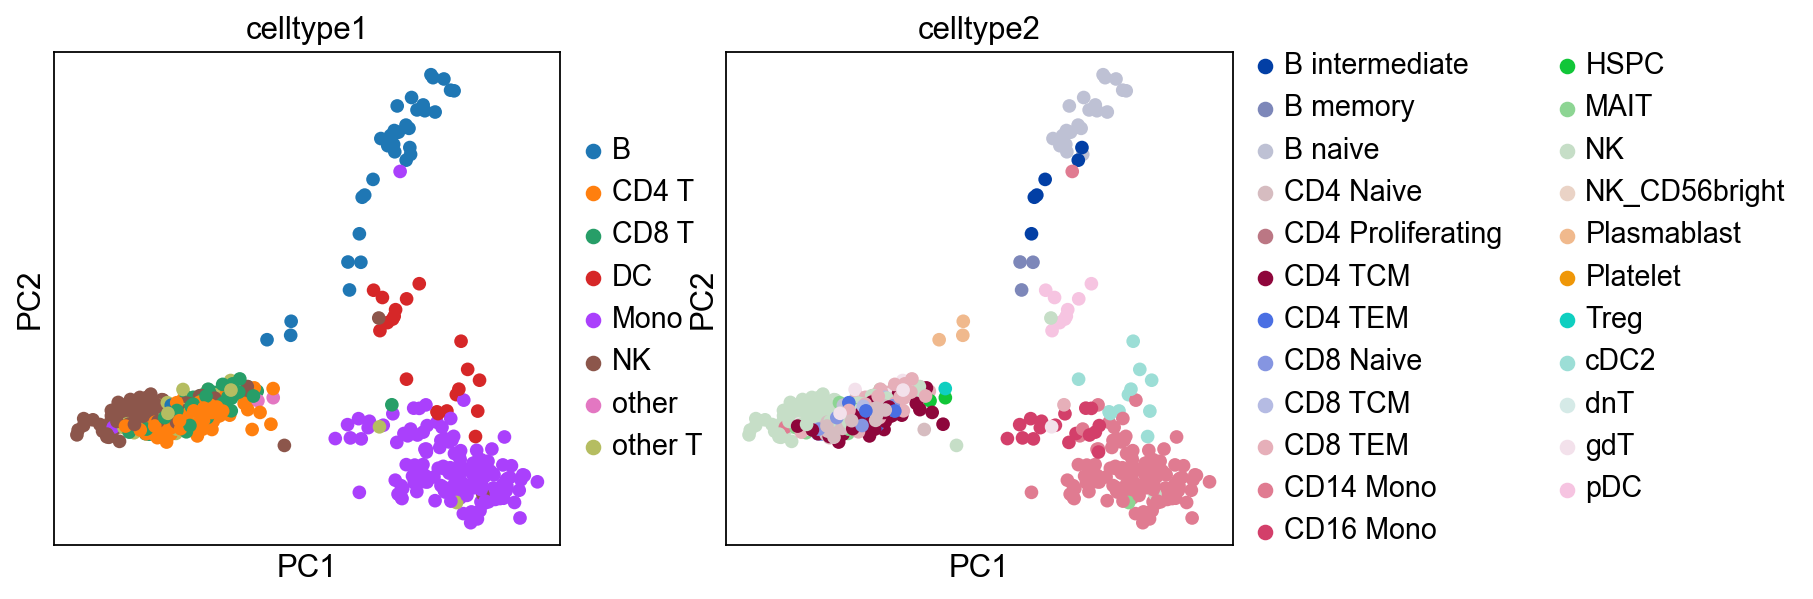

In [17]:
sc.pl.pca(adata, color=["celltype1", "celltype2"])

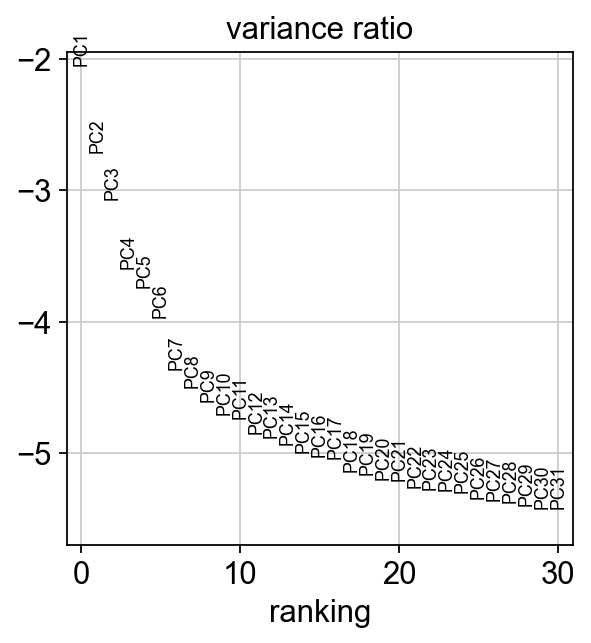

In [18]:
sc.pl.pca_variance_ratio(adata, log=True)

In [19]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [20]:
## choose the resolution which produce the same number of clusters as the celltype1
for res in np.arange(0.0,2,0.01):
    sc.tl.leiden(adata, res)
    if len(set(adata.obs["leiden"])) == len(set(adata.obs["celltype1"])):
        break

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering


/tmp/ipykernel_2052988/1209000394.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, res)


    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', 

In [21]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:02)


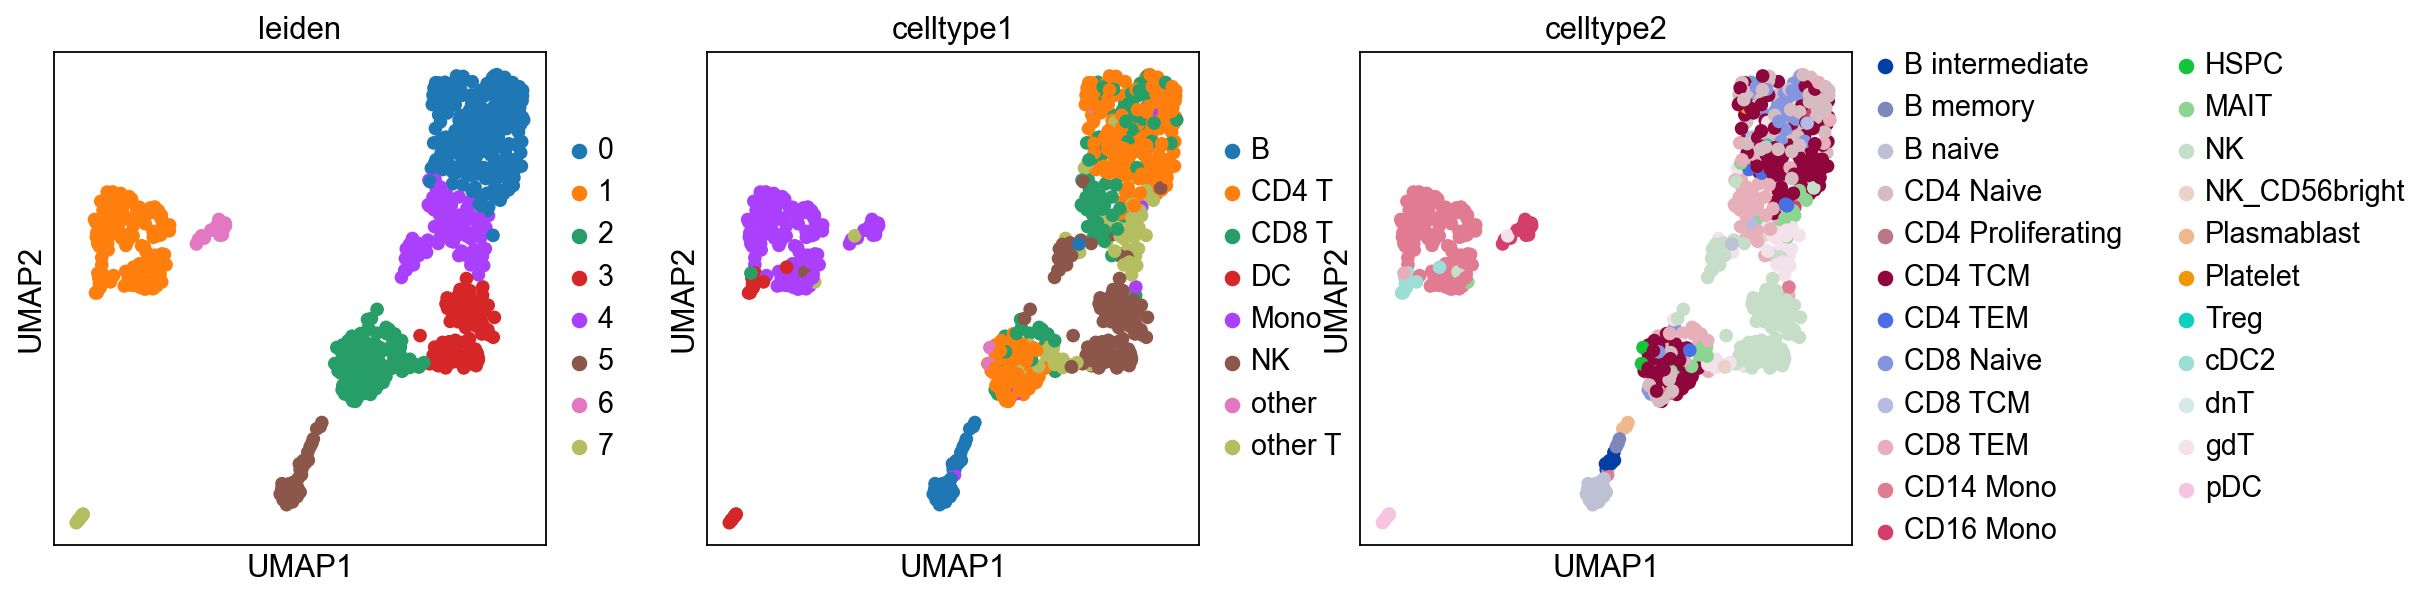

In [22]:
sc.pl.umap(adata, color=["leiden", "celltype1", "celltype2"])

In [23]:
from sklearn.metrics import adjusted_rand_score

In [24]:
adjusted_rand_score(adata.obs["celltype1"], adata.obs["leiden"])

0.48737749696141813